# Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed

In [63]:
import pandas as pd
import numpy as np
import seaborn as sn
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

In [64]:
crime_df = pd.read_csv("D:\Excelr_assignments\Clustering\data\crime_data (1).csv")
crime_df.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [65]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [66]:
scaler = StandardScaler()
scaled_crime_df = scaler.fit_transform(crime_df[['Murder','Assault','UrbanPop','Rape']])

## Heirachical clustering


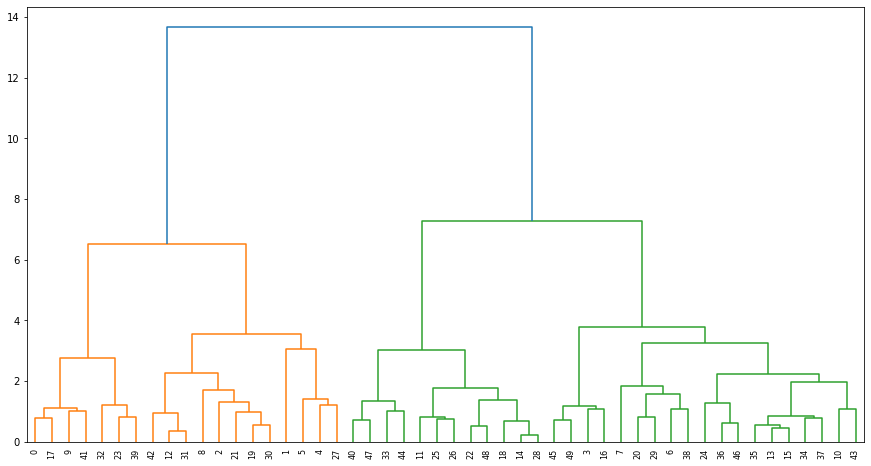

In [67]:
#create dendogram
plt.figure(figsize=(15,8))
dendogram = sch.dendrogram(sch.linkage(scaled_crime_df, method='ward'))

In [68]:
#Creating Clusters and associating With the actual dataframe
h_clusters = AgglomerativeClustering(3)
h_clusters.fit(scaled_crime_df)
crime_df["H_Clusters_Id"] = h_clusters.labels_

In [69]:
crime_df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,H_Clusters_Id
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [70]:
crime_df.groupby("H_Clusters_Id").mean()

,Murder,Assault,UrbanPop,Rape
H_Clusters_Id,,,,
0,12.331579,259.315789,68.315789,29.215789
1,6.210526,142.052632,71.263158,19.184211
2,3.091667,76.000000,52.083333,11.833333


# USing K Means

In [71]:
crime_k = pd.read_csv("D:\Excelr_assignments\Clustering\data\crime_data (1).csv")
crime_k.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [72]:
#Normalizing functions
scaler = StandardScaler()
scaled_crime_k = scaler.fit_transform(crime_k[['Murder','Assault','UrbanPop','Rape']])


Text(0, 0.5, 'WCSS')

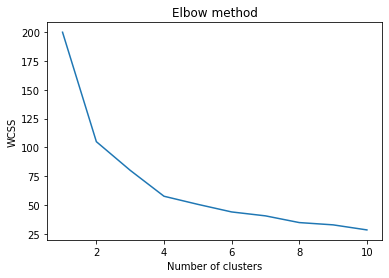

In [73]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_crime_k)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

In [74]:
#Build  Clusters Algorthhm
k = 2
clusters_k = KMeans()
clusters_k.fit(scaled_crime_k)
crime_df["K_Clusters"]=clusters_k.labels_

In [75]:
# Filtering crime k dataframe with clusters,high crime rate
crime_df[crime_df.K_Clusters==0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,H_Clusters_Id,K_Clusters
6,Connecticut,3.3,110,77,11.1,1,0
10,Hawaii,5.3,46,83,20.2,1,0
20,Massachusetts,4.4,149,85,16.3,1,0
29,New Jersey,7.4,159,89,18.8,1,0
38,Rhode Island,3.4,174,87,8.3,1,0
43,Utah,3.2,120,80,22.9,1,0


In [76]:
crime_df[crime_df.K_Clusters==1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,H_Clusters_Id,K_Clusters
2,Arizona,8.1,294,80,31.0,0,1
8,Florida,15.4,335,80,31.9,0,1
12,Illinois,10.4,249,83,24.0,0,1
19,Maryland,11.3,300,67,27.8,0,1
21,Michigan,12.1,255,74,35.1,0,1
30,New Mexico,11.4,285,70,32.1,0,1
31,New York,11.1,254,86,26.1,0,1
42,Texas,12.7,201,80,25.5,0,1


## DBSCAN Clustering

In [77]:
crime_db = pd.read_csv("D:\Excelr_assignments\Clustering\data\crime_data (1).csv")
crime_db.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [78]:
#Normalizing function
scaler = StandardScaler()
scaled_crime_db = scaler.fit_transform(crime_db[['Murder','Assault','UrbanPop','Rape']])


In [79]:
#fittiing the dbscan model to get clusters
db_clusters = DBSCAN(eps=1.2,min_samples=4)
db_clusters.fit(scaled_crime_db)
crime_df["DB_Clusters"] = db_clusters.labels_

In [80]:
crime_df.groupby("DB_Clusters").mean()

,Murder,Assault,UrbanPop,Rape,H_Clusters_Id,K_Clusters
DB_Clusters,,,,,,
-1,10.900000,266.000000,75.600000,40.340000,0.000000,4.400000
0,14.671429,251.285714,54.285714,21.685714,0.000000,2.000000
1,6.110526,143.394737,66.289474,18.634211,1.131579,3.736842


In [81]:
#Final Datframe with all three clustering methods results 
crime_df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,H_Clusters_Id,K_Clusters,DB_Clusters
0,Alabama,13.2,236,58,21.2,0,2,0
1,Alaska,10.0,263,48,44.5,0,6,-1
2,Arizona,8.1,294,80,31.0,0,1,1
3,Arkansas,8.8,190,50,19.5,1,7,1
4,California,9.0,276,91,40.6,0,5,-1
5,Colorado,7.9,204,78,38.7,0,5,-1
6,Connecticut,3.3,110,77,11.1,1,0,1
7,Delaware,5.9,238,72,15.8,1,7,1
8,Florida,15.4,335,80,31.9,0,1,-1
9,Georgia,17.4,211,60,25.8,0,2,0
